In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind_from_stats
from scipy.special import logit, expit
from sklearn.metrics import auc,roc_curve,roc_auc_score, precision_recall_curve, average_precision_score, auc, balanced_accuracy_score, accuracy_score, classification_report
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=15

Using Theano backend.
Can not use cuDNN on context None: cannot compile with cuDNN. We got this error:
b'/tmp/try_flags_p6_uebj2.c:4:10: fatal error: cudnn.h: No such file or directory\n #include <cudnn.h>\n          ^~~~~~~~~\ncompilation terminated.\n'
Preallocating 10619/11178 Mb (0.950000) on cuda
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:60:00.0)


In [2]:
classification_model = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/classification_model_4.hdf5", compile = False)

In [3]:
def evaluate_model(X,Y,model, prefix):
    pred = model.predict_proba(X)
    
    fpr, tpr, thresholds = roc_curve(Y, pred, pos_label=1)
    auRoc = auc(fpr, tpr)

    precision, recall, thresholds = precision_recall_curve(Y,pred)
    auPrc = auc(recall, precision)
    averagePrecision = average_precision_score(Y, pred)
    pred_binary = pred>0.5
    balancedAccuracy = balanced_accuracy_score(Y, pred_binary)
    
    negativeClassTrue = []
    negativeClassPred = []
    positiveClassTrue = []
    positiveClassPred = []
    
    for i, val in enumerate(Y):
        currTrueLabel = Y[i]
        currPred = pred_binary[i]
        if currTrueLabel == 0:
            negativeClassTrue.append(currTrueLabel)
            negativeClassPred.append(currPred)
        else:
            positiveClassTrue.append(currTrueLabel)
            positiveClassPred.append(currPred)            

            
    negativeClassTrue = np.array(negativeClassTrue)
    negativeClassPred = np.array(negativeClassPred)
    positiveClassTrue = np.array(positiveClassTrue)
    positiveClassPred = np.array(positiveClassPred)
    
    negativeAccuracy = accuracy_score(negativeClassTrue, negativeClassPred)
    positiveAccuracy = accuracy_score(positiveClassTrue, positiveClassPred)
    
    print("auROC:",auRoc)
    print("Average precision:",averagePrecision)
    print("auPRC:",auPrc)
    print("Balanced Accuracy:",balancedAccuracy)
    print("Positive Accuracy:",positiveAccuracy)
    print("Negative Accuracy:",negativeAccuracy)
    print("Classification Report:")
    print(classification_report(Y, pred_binary))
    
    plt.figure()

    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.title("ROC (AUC: " +str(round(auRoc,2))+")")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.savefig(prefix+"_roc.svg")
    
    plt.figure()    
    plt.step(recall, precision, color='b', alpha=0.2,where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b')
    plt.title("Precision-Recall (AUC: " +str(round(auPrc,2))+")")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.savefig(prefix+"_prc.svg")


In [6]:
X_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chrs_training_summit_centered_training_set_hg19_classification_X.npy')
Y_train = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/chrs_training_summit_centered_training_set_hg19_classification_Y.npy')
X_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chr4_summit_centered_validation_set_classification_X.npy')
Y_valid = np.load('/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/chr4_summit_centered_validation_set_classification_Y.npy')

auROC: 0.9559427951328814
Average precision: 0.9689432202284409
auPRC: 0.9689344809079781
Balanced Accuracy: 0.8872426673820788
Positive Accuracy: 0.9336873939662167
Negative Accuracy: 0.8407979407979408
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      7770
         1.0       0.91      0.93      0.92     13557

   micro avg       0.90      0.90      0.90     21327
   macro avg       0.90      0.89      0.89     21327
weighted avg       0.90      0.90      0.90     21327



/home/eramamur/bin/miniconda3/envs/gpu_keras_theano/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


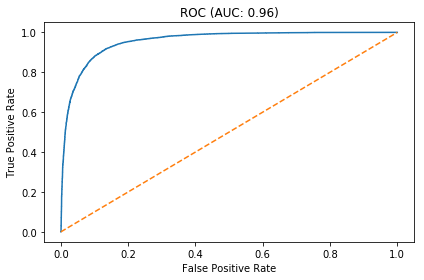

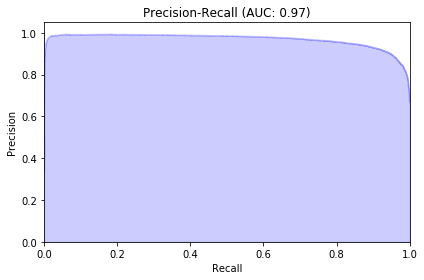

In [5]:
evaluate_model(X_valid,Y_valid,classification_model, "neun_validation")

auROC: 0.8549320023338045
Average precision: 0.9087844783319815
auPRC: 0.9087838837810679
Balanced Accuracy: 0.7715929373663086
Positive Accuracy: 0.7054665022605836
Negative Accuracy: 0.8377193724720338
Classification Report:
              precision    recall  f1-score   support

         0.0       0.63      0.84      0.72     59089
         1.0       0.88      0.71      0.78     97320

   micro avg       0.76      0.76      0.76    156409
   macro avg       0.76      0.77      0.75    156409
weighted avg       0.79      0.76      0.76    156409



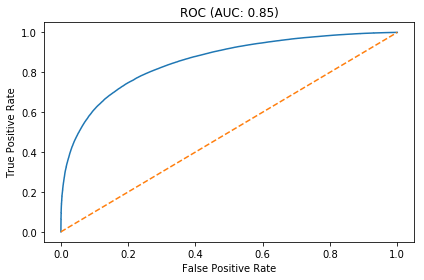

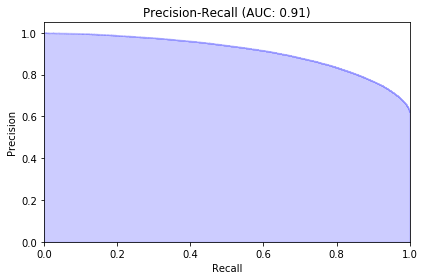

In [7]:
evaluate_model(X_train,Y_train,classification_model, "neun_training")